# Childline Kenya Call Volume Prediction Challenge

https://zindi.africa/hackathons/zindi-mentorship-3-childline-kenya-call-volume-prediction-challenge/leaderboard

**Objectives**

The objective of this competition is to create a forecast model to predict the number of incoming calls 
that Childline Kenya will receive per hour per day.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [ ]:
df=pd.read_csv('train_2.csv')
df.head(2)

In [ ]:
df.isna().mean()*100

In [ ]:
df.dtypes

In [ ]:
df['calldate']=pd.to_datetime(df['calldate'])

In [ ]:
df['day']=df['calldate'].dt.day
df['month']=df['calldate'].dt.month
df['year']=df['calldate'].dt.year
df['hour']=df['calldate'].dt.hour

In [ ]:
df1=df[['day','month','year','hour']]
df1.sample(5)

In [ ]:
df1['call']=df1.groupby(['day','month','hour'])['hour'].transform('count')

In [ ]:
df1.sample(5)

In [ ]:
df1=df1.drop_duplicates(subset=['day','month','year','call']).reset_index(drop=True)

In [ ]:
df1.head()

In [ ]:
df1.call.plot(figsize=(12,8), sharex=True, legend=True, label="call");

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x=df1['call'],y=df1['month'], ax=ax)

In [ ]:
test=pd.date_range(start='2016-07-13', end='2016-09-07', freq='H',name='calldate')


In [ ]:
test=pd.DataFrame(test)

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
# etracting day, month, hour, year from date
test['day']=test['calldate'].dt.day
test['month']=test['calldate'].dt.month
test['year']=test['calldate'].dt.year
test['hour']=test['calldate'].dt.hour

In [ ]:
test_set=test.drop(('calldate'),axis=1)

In [ ]:
test_set.head()

In [ ]:
holidays = pd.read_csv('C:/Users/hzhdzt/Downloads/KenyaPublicHolidays2016.csv')
holidays.head()

In [ ]:
holidays=holidays.iloc[2:, :1].reset_index(drop=True)

In [ ]:
holidays['Public holidays Kenya 2017']=pd.to_datetime(holidays['Public holidays Kenya 2017'])

In [ ]:
# extracting day, month, hour from date
holidays['day']=holidays['Public holidays Kenya 2017'].dt.day
holidays['month']=holidays['Public holidays Kenya 2017'].dt.month
holidays['year']=holidays['Public holidays Kenya 2017'].dt.year

In [ ]:
holidays=holidays.iloc[:,1:]
holidays.head()

In [ ]:
holidays['holiday']=1

In [ ]:
df1=pd.merge(df1,holidays, on=['day','month','year'], how='left')
test_set=pd.merge(test_set,holidays, on=['day','month','year'], how='left')

In [ ]:
# making non-public holidays zero(0)
df1['holiday']=df1['holiday'].fillna(0)
test_set['holiday']=test_set['holiday'].fillna(0)

In [ ]:
df1['holiday']=df1['holiday'].astype('int')
test_set['holiday']=test_set['holiday'].astype('int')

In [ ]:
df1['weekday']=df['calldate'].dt.dayofweek
test_set['weekday']=test['calldate'].dt.dayofweek

In [ ]:
df1['weekday/weekend'] = df1['weekday'].apply(lambda x: 1 if x <= 4 else 0)
df1.sample(5)

In [ ]:
test_set['weekday/weekend'] = test_set['weekday'].apply(lambda x: 1 if x <= 4 else 0)
test_set.sample(5)

In [ ]:
schdays=pd.read_csv('C:/Users/hzhdzt/Downloads/NairobiSchoolDates2016.csv')

In [ ]:
schdays

In [ ]:
schdays=pd.date_range(start='2016-01-04', end='2016-04-08', freq='H', name='schooldates')
schdays=pd.DataFrame(schdays)

In [ ]:
schdays1=pd.date_range(start='2016-05-02', end='2016-08-05', freq='H', name='schooldates')
schdays1=pd.DataFrame(schdays1)

In [ ]:
schdays2=pd.date_range(start='2016-09-05', end='2016-11-18', freq='H', name='schooldates')
schdays2=pd.DataFrame(schdays2)

In [ ]:
schdays=pd.concat([schdays,schdays1,schdays2])
schdays.sample(3)

In [ ]:
# extracting day,hour,month from date
schdays['day']=schdays['schooldates'].dt.day
schdays['sch_days/nonsch_days']=schdays['schooldates'].dt.day
schdays['month']=schdays['schooldates'].dt.month
schdays['year']=schdays['schooldates'].dt.year

In [ ]:
schdays.sample(3)

In [ ]:
# replacing schooldays with one(1)
schdays['sch_days/nonsch_days']=1
schdays.sample(3)

In [ ]:
df1=pd.merge(df1,schdays, on=['day','month','year'], how='left')
test_set=pd.merge(test_set,schdays, on=['day','month','year'], how='left')

In [ ]:
# Making the values of holidays as zero(0)
df1['sch_days/nonsch_days']=df1['sch_days/nonsch_days'].fillna(0)
test_set['sch_days/nonsch_days']=test_set['sch_days/nonsch_days'].fillna(0)

In [ ]:
df1['month_count']=df1.groupby('month')['call'].sum()
df1['weekday_count']=df1.groupby('weekday')['call'].sum()
df1['day_count']=df1.groupby('day')['call'].sum()
df1['hour_count']=df1.groupby('hour')['call'].sum()

In [ ]:
test_set['call']=df1['call']

In [ ]:
test_set['month_count']=test_set.groupby('month')['call'].sum()
test_set['weekday_count']=test_set.groupby('weekday')['call'].sum()
test_set['day_count']=test_set.groupby('day')['call'].sum()
test_set['hour_count']=test_set.groupby('hour')['call'].sum()

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x=df1['hour'],y=df1['call'], ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x=df1['month'],y=df1['call'], ax=ax)

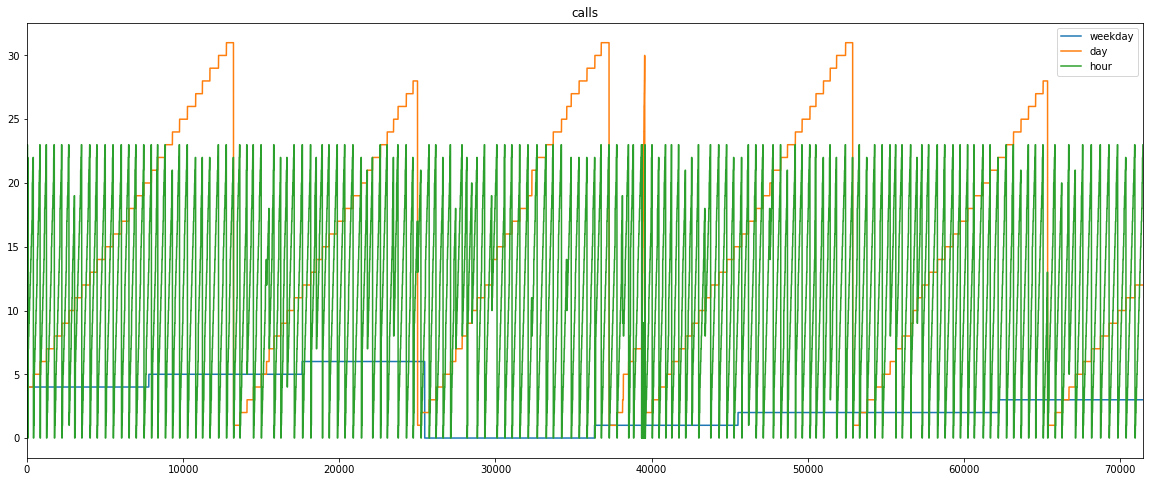

In [125]:
df1.weekday.iloc[:-12].plot(figsize=(20,8), legend=True, label='weekday', title = "calls")
df1.day.iloc[:-12].plot(legend=True, label='day')
df1.hour.iloc[:-12].plot(legend=True, label='hour');

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='holiday', y ='call', data=df1.iloc[:-12], ax= ax, boxprops=dict(alpha=.5))
sns.swarmplot(x='holiday', y ='call', data=df1.iloc[:-12], alpha=0.9);
ax.set_title("Calls Distribution on holidays");

In [ ]:
#Plot heatmap of feature correlation
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr())

**feature selection**

In [ ]:
X=df1.drop(['call','schooldates','sch_days/nonsch_days'],axis=1)
y=df1['call']
test_X=test_set.drop(['schooldates','sch_days/nonsch_days','call'],axis=1)


In [ ]:
X.shape

In [ ]:
test_X.shape

**Scalling and Splitting**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

**Model Training**

In [ ]:
#LIGHTGBM
lb=LGBMRegressor()
lb.fit(X_train,y_train)
lb.score(X_test,y_test)

In [ ]:
predi=lb.predict(X_test)
sqrt(mean_squared_error(y_test,predi))

**Generalization with test data**

In [ ]:
san2=lb.predict(test_X)

In [ ]:
test_X['hour']=test_X['hour'].astype('str')
test_X['day']=test_X['day'].astype('str')
test_X['month']=test_X['month'].astype('str')
test_X['year']=test_X['year'].astype('str')

In [ ]:
test_X['hour']=test_X['hour'].apply(lambda x: '0'+x if len(x)==1 else x)
test_X['day']=test_X['day'].apply(lambda x: '0'+x if len(x)==1 else x)
test_X['month']=test_X['month'].apply(lambda x: '0'+x if len(x)==1 else x)
test_X['year']=test_X['year'].apply(lambda x: '0'+x if len(x)==1 else x)

In [ ]:
san1=test_X['year']+test_X['month']+test_X['day']+test_X['hour']
san1.sample(3)

In [ ]:
sub2=pd.DataFrame(san1,columns=['time_index'])

In [ ]:
sub2['calls']=san2
sub2['calls']=sub2['calls'].astype('int')

In [ ]:
sub2.to_csv('lb.csv', index = False)